# Constraint upset plot
Plot the intersection of constrained transcripts and regions

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Imports
import matplotlib.pyplot as plt
import pandas as pd
import upsetplot

from src import constants as C
from src import visualisation as vis

In [3]:
# Style and colors
plt.style.use(C.STYLE_DEFAULT)
default_palette = vis.color_palette()
region_palette = vis.color_palette("regions")

In [4]:
# Read data
df = pd.read_csv(C.STATS_UPSET_CONSTRAINT, sep="\t", index_col="enst")

In [5]:
# Reformat prior to plotting
upset_data = upsetplot.from_indicators(C.REGION_LABELS, data=df)

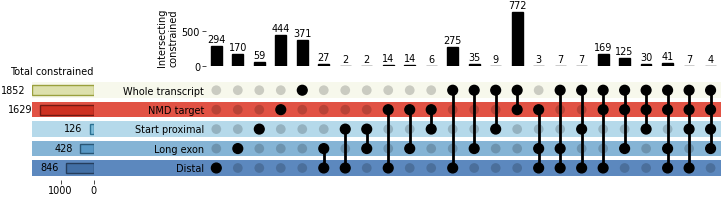

In [74]:
# Visualise the plot
upset = upsetplot.UpSet(
    upset_data,
    sort_categories_by="-input",
    max_subset_size=2500,
    # show_counts=True,
    element_size=20,
    intersection_plot_elements=3,
    totals_plot_elements=3,
    facecolor="Black",
)

for region, colour in zip(C.REGION_LABELS, region_palette):
    upset.style_categories(
        region,
        shading_facecolor=vis.adjust_lightness(colour, 1.1),
        bar_facecolor=vis.adjust_lightness(colour, 0.9),
        bar_edgecolor=vis.adjust_lightness(colour, 0.5)
    )

u = upset.plot()

# Customise the "totals" Axes
u["totals"].grid(False)
# u["totals"].set_xticks([])
u["totals"].spines["bottom"].set_visible(False)
u["totals"].set_title("Total constrained", loc="right", ha="right")
for c in u["totals"].containers:
    u["totals"].bar_label(c, padding=5)

# Customise the "intersection" Axes
u["intersections"].set_ylabel("Intersecting\nconstrained", va="bottom", loc="bottom")
u["intersections"].grid(False)
# u["intersections"].set_yticks([])
u["intersections"].spines["left"].set_visible(False)
for c in u["intersections"].containers:
    u["intersections"].bar_label(c, padding=1)